In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#values are taken from DESI 2024 VI: Cosmological Constraints.. 
w0_mean = 0.827
w0_sigma = 0.0632
wa_mean =  0.75
wa_sigma = 0.272
#correlation value assumed from Planck 2018
p = -0.83

#variances on the diagonal of cov matrix 
cov_00 = w0_sigma**2 
cov_11 = wa_sigma**2  
#covariances on off-diagonal of cov matrix 
cov_01 = p * w0_sigma * wa_sigma 

cov_10 = cov_01  #covariance matrix is symmetric
cov_matrix = np.array([
    [cov_00, cov_01], 
    [cov_10, cov_11]])

In [ ]:
#mean vector
#the mean vector is the center of the 2D Gaussian distribution
mu = np.array([w0_mean, wa_mean])

#grid of points for the contour plot of 2D Gaussian distribution defined by the mean vector and covariance matrix
#grid covers a range around the mean, scaled by the standard deviations, set to cover 5 standard deviations in each direction
#500 values between muw0 +/- 5*sigmaw0 and muwa +/- 5*sigmawa
#99.99994% of the probability mass is within +/- 5σ
x = np.linspace(mu[0] - 5*w0_sigma, mu[0] + 5*w0_sigma, 500)
y = np.linspace(mu[1] - 5*wa_sigma, mu[1] + 5*wa_sigma, 500)
#create a meshgrid for the contour plot
#2D arrays X/Y = coordinates for the grid points (X = w0, Y = wa)
X, Y = np.meshgrid(x, y)

#calculate the 2D Gaussian distribution values for each point in the grid using the multivariate normal distribution formula
#the formula is: P(x) = (1 / (2 * pi * sqrt(det(cov)))) * exp(-0.5 * (x - mu).T @ inv(cov) @ (x - mu))
from scipy.stats import multivariate_normal
#np.dstack combines X and Y into a 2D array where each row is a point (w0, wa)
#so position[i, j] = [X[i,j], Y[i,j]]
#function from scipy.stats computes the value of the gaussian probability distribution function at each point in that array
Z = multivariate_normal.pdf(np.dstack((X, Y)), mean=mu, cov=cov_matrix) 


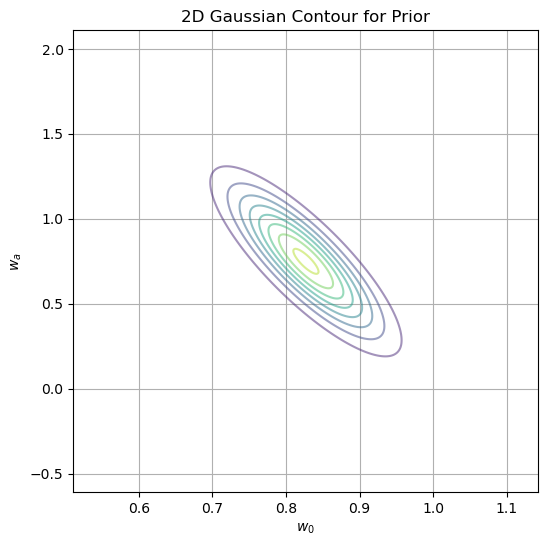

In [ ]:
#plot the contour lines of the 2D Gaussian distribution
fig, ax = plt.subplots(figsize=(6,6))
#each contour line encloses region of constant probability density
#uncertainty in each parameter = how wide the ellipse is 
#correlation between parameters = ellipse angle
#if negatively correlated = ellipses tilt downward
contour = ax.contour(X, Y, Z, levels=10, alpha=0.5)

#setting the labels and title for the plot
ax.set_xlabel("$w_0$")
ax.set_ylabel("$w_a$")
ax.set_title("2D Gaussian Contour for Prior")
ax.grid(True)
plt.show()
